This tutorial includes simple linear regression using gradient descent and OLS (Ordinary Least Square) - FIXED VERSION


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [18]:
# This makes more sense: predicting weight from height
x = df[['Height']]  # independent feature (Height)
y = df['Weight']    # dependent feature (Weight)

print("Data shapes:")
print(f"X (Height) shape: {x.shape}")
print(f"Y (Weight) shape: {y.shape}")


Data shapes:
X (Height) shape: (23, 1)
Y (Weight) shape: (23,)


In [19]:
print("\nData ranges:")
print(f"Height range: {df['Height'].min()} - {df['Height'].max()} cm")
print(f"Weight range: {df['Weight'].min()} - {df['Weight'].max()} kg")



Data ranges:
Height range: 120 - 183 cm
Weight range: 45 - 105 kg


In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training set: {xtrain.shape[0]} samples")
print(f"Test set: {xtest.shape[0]} samples")


Training set: 18 samples
Test set: 5 samples


In [21]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


In [22]:
print("Standardization parameters:")
print(f"Mean: {scaler.mean_[0]:.2f}")
print(f"Scale: {scaler.scale_[0]:.2f}")
print(f"Original height range: {xtrain.min()[0]:.1f} - {xtrain.max()[0]:.1f}")
print(f"Scaled height range: {xtrain_scaled.min():.2f} - {xtrain_scaled.max():.2f}")

Standardization parameters:
Mean: 157.50
Scale: 18.03
Original height range: 123.0 - 183.0
Scaled height range: -1.91 - 1.41


/tmp/ipykernel_43794/3228191926.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Original height range: {xtrain.min()[0]:.1f} - {xtrain.max()[0]:.1f}")


In [23]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(xtrain_scaled, ytrain)
print(f"Coefficient: {linear.coef_[0]:.4f}")
print(f"Intercept: {linear.intercept_:.2f}")
print(f"\nModel equation: Weight = {linear.coef_[0]:.4f} × (Height_standardized) + {linear.intercept_:.2f}")
print(f"This means for every 1 standard deviation increase in height, weight increases by {linear.coef_[0]:.2f} kg")


Coefficient: 16.7156
Intercept: 74.28

Model equation: Weight = 16.7156 × (Height_standardized) + 74.28
This means for every 1 standard deviation increase in height, weight increases by 16.72 kg


In [24]:
# Now predicting WEIGHT from HEIGHT (which makes more sense)
test_height = 170  # cm
test_height_scaled = scaler.transform([[test_height]])
predicted_weight = linear.predict(test_height_scaled)

print(f"For a height of {test_height} cm, predicted weight is {predicted_weight[0]:.2f} kg")

# Test multiple heights to see reasonable predictions
test_heights = [150, 160, 170, 180, 190]
print("\nPredictions for different heights:")
for height in test_heights:
    height_scaled = scaler.transform([[height]])
    weight_pred = linear.predict(height_scaled)
    print(f"Height: {height} cm -> Predicted Weight: {weight_pred[0]:.2f} kg")


For a height of 170 cm, predicted weight is 85.87 kg

Predictions for different heights:
Height: 150 cm -> Predicted Weight: 67.32 kg
Height: 160 cm -> Predicted Weight: 76.60 kg
Height: 170 cm -> Predicted Weight: 85.87 kg
Height: 180 cm -> Predicted Weight: 95.14 kg
Height: 190 cm -> Predicted Weight: 104.42 kg


/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Standar

In [8]:
# If you still want to predict HEIGHT from WEIGHT (your original approach)
print("="*60)
print("ALTERNATIVE: Predicting HEIGHT from WEIGHT (Original approach)")
print("="*60)

# Swap the variables back
x_alt = df[['Weight']]  # Weight as independent
y_alt = df['Height']    # Height as dependent

# Train test split
xtrain_alt, xtest_alt, ytrain_alt, ytest_alt = train_test_split(x_alt, y_alt, test_size=0.2, random_state=42)

# Standardize
scaler_alt = StandardScaler()
xtrain_alt_scaled = scaler_alt.fit_transform(xtrain_alt)
xtest_alt_scaled = scaler_alt.transform(xtest_alt)

# Train model
linear_alt = LinearRegression()
linear_alt.fit(xtrain_alt_scaled, ytrain_alt)

print(f"Model equation: Height = {linear_alt.coef_[0]:.4f} × (Weight_standardized) + {linear_alt.intercept_:.2f}")

# Test prediction with reasonable weight
test_weight = 70  # kg
test_weight_scaled = scaler_alt.transform([[test_weight]])
predicted_height = linear_alt.predict(test_weight_scaled)

print(f"\nFor a weight of {test_weight} kg, predicted height is {predicted_height[0]:.2f} cm")

# Test multiple weights
test_weights = [50, 60, 70, 80, 90]
print("\nPredictions for different weights:")
for weight in test_weights:
    weight_scaled = scaler_alt.transform([[weight]])
    height_pred = linear_alt.predict(weight_scaled)
    print(f"Weight: {weight} kg -> Predicted Height: {height_pred[0]:.2f} cm")


ALTERNATIVE: Predicting HEIGHT from WEIGHT (Original approach)
Model equation: Height = 17.0344 × (Weight_standardized) + 157.50

For a weight of 70 kg, predicted height is 153.38 cm

Predictions for different weights:
Weight: 50 kg -> Predicted Height: 134.12 cm
Weight: 60 kg -> Predicted Height: 143.75 cm
Weight: 70 kg -> Predicted Height: 153.38 cm
Weight: 80 kg -> Predicted Height: 163.01 cm
Weight: 90 kg -> Predicted Height: 172.64 cm


/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/vidit/Public/course/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Standar

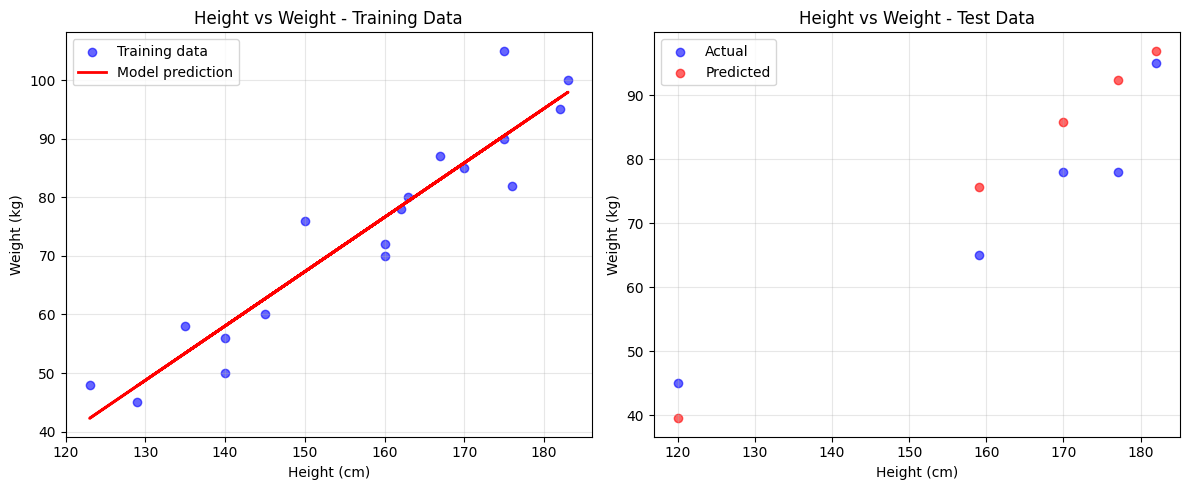

In [9]:
# Visualization of the model
plt.figure(figsize=(12, 5))

# Plot 1: Training data with model
plt.subplot(1, 2, 1)
plt.scatter(xtrain, ytrain, color='blue', alpha=0.6, label='Training data')
plt.plot(xtrain, linear.predict(xtrain_scaled), color='red', linewidth=2, label='Model prediction')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight - Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Test data with predictions
plt.subplot(1, 2, 2)
ypred = linear.predict(xtest_scaled)
plt.scatter(xtest, ytest, color='blue', alpha=0.6, label='Actual')
plt.scatter(xtest, ypred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight - Test Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Model Performance (Height → Weight):
MSE: 83.24
MAE: 8.08
RMSE: 9.12
R2 Score: 0.6982
Adjusted R2 Score: 0.5975


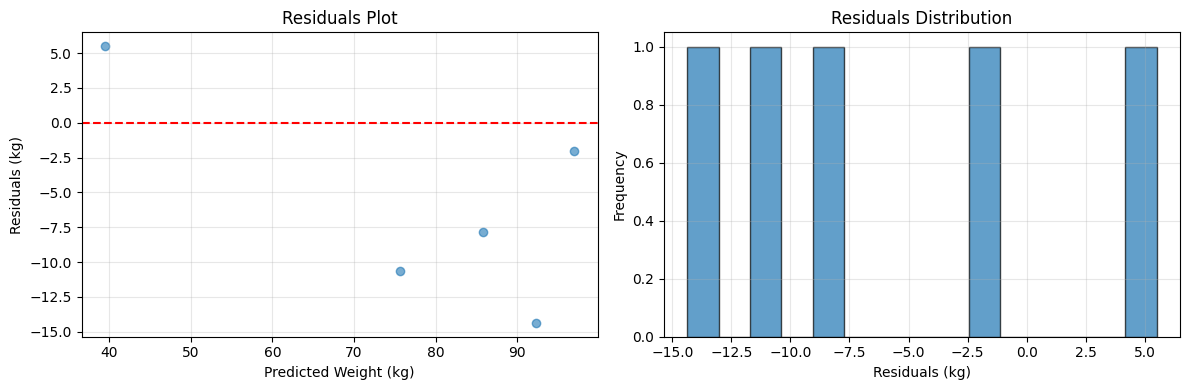

In [10]:
# Model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ypred = linear.predict(xtest_scaled)
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print("Model Performance (Height → Weight):")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Adjusted R2 Score
n = len(ytest)
p = len(linear.coef_)
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f"Adjusted R2 Score: {adjusted_r2:.4f}")

# Residuals plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
residuals = ytest - ypred
plt.scatter(ypred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Weight (kg)')
plt.ylabel('Residuals (kg)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals (kg)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:
# OLS (Ordinary Least Squares) Analysis
from statsmodels.api import OLS
import statsmodels.api as sm

print("="*60)
print("OLS ANALYSIS (Height → Weight)")
print("="*60)

# Add constant term for OLS (intercept)
xtrain_with_const = sm.add_constant(xtrain_scaled)
xtest_with_const = sm.add_constant(xtest_scaled)

# Fit OLS model
ols_model = OLS(ytrain, xtrain_with_const)
ols_results = ols_model.fit()

print("OLS Summary:")
print(ols_results.summary())

# OLS predictions
ols_predictions = ols_results.predict(xtest_with_const)

# Compare OLS vs Sklearn predictions
print(f"\nComparison of predictions:")
print(f"Sklearn prediction for first test sample: {linear.predict(xtest_scaled[0:1])[0]:.4f}")
print(f"OLS prediction for first test sample: {ols_predictions[0]:.4f}")
print(f"Difference: {abs(linear.predict(xtest_scaled[0:1])[0] - ols_predictions[0]):.6f}")

# OLS model equation
print(f"\nOLS Model Equation:")
print(f"Weight = {ols_results.params[0]:.4f} + {ols_results.params[1]:.4f} × (Height_standardized)")
print(f"R-squared: {ols_results.rsquared:.4f}")
print(f"Adjusted R-squared: {ols_results.rsquared_adj:.4f}")
print(f"F-statistic: {ols_results.fvalue:.4f}")
print(f"P-value: {ols_results.f_pvalue:.6f}")


OLS ANALYSIS (Height → Weight)
OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           3.53e-09
Time:                        15:38:31   Log-Likelihood:                -57.133
No. Observations:                  18   AIC:                             118.3
Df Residuals:                      16   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

/tmp/ipykernel_43794/247170793.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Weight = {ols_results.params[0]:.4f} + {ols_results.params[1]:.4f} × (Height_standardized)")


In [13]:
# OLS for Weight → Height (Alternative approach)
print("="*60)
print("OLS ANALYSIS (Weight → Height)")
print("="*60)

# Add constant term for OLS
xtrain_alt_with_const = sm.add_constant(xtrain_alt_scaled)
xtest_alt_with_const = sm.add_constant(xtest_alt_scaled)

# Fit OLS model
ols_model_alt = OLS(ytrain_alt, xtrain_alt_with_const)
ols_results_alt = ols_model_alt.fit()

print("OLS Summary (Weight → Height):")
print(ols_results_alt.summary())

# OLS predictions
ols_predictions_alt = ols_results_alt.predict(xtest_alt_with_const)

# Compare OLS vs Sklearn predictions
print(f"\nComparison of predictions (Weight → Height):")
print(f"Sklearn prediction for first test sample: {linear_alt.predict(xtest_alt_scaled[0:1])[0]:.4f}")
print(f"OLS prediction for first test sample: {ols_predictions_alt[0]:.4f}")
print(f"Difference: {abs(linear_alt.predict(xtest_alt_scaled[0:1])[0] - ols_predictions_alt[0]):.6f}")

# OLS model equation
print(f"\nOLS Model Equation (Weight → Height):")
print(f"Height = {ols_results_alt.params[0]:.4f} + {ols_results_alt.params[1]:.4f} × (Weight_standardized)")
print(f"R-squared: {ols_results_alt.rsquared:.4f}")
print(f"Adjusted R-squared: {ols_results_alt.rsquared_adj:.4f}")
print(f"F-statistic: {ols_results_alt.fvalue:.4f}")
print(f"P-value: {ols_results_alt.f_pvalue:.6f}")


OLS ANALYSIS (Weight → Height)
OLS Summary (Weight → Height):
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           3.53e-09
Time:                        15:39:15   Log-Likelihood:                -57.473
No. Observations:                  18   AIC:                             118.9
Df Residuals:                      16   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/tmp/ipykernel_43794/1958553554.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Height = {ols_results_alt.params[0]:.4f} + {ols_results_alt.params[1]:.4f} × (Weight_standardized)")


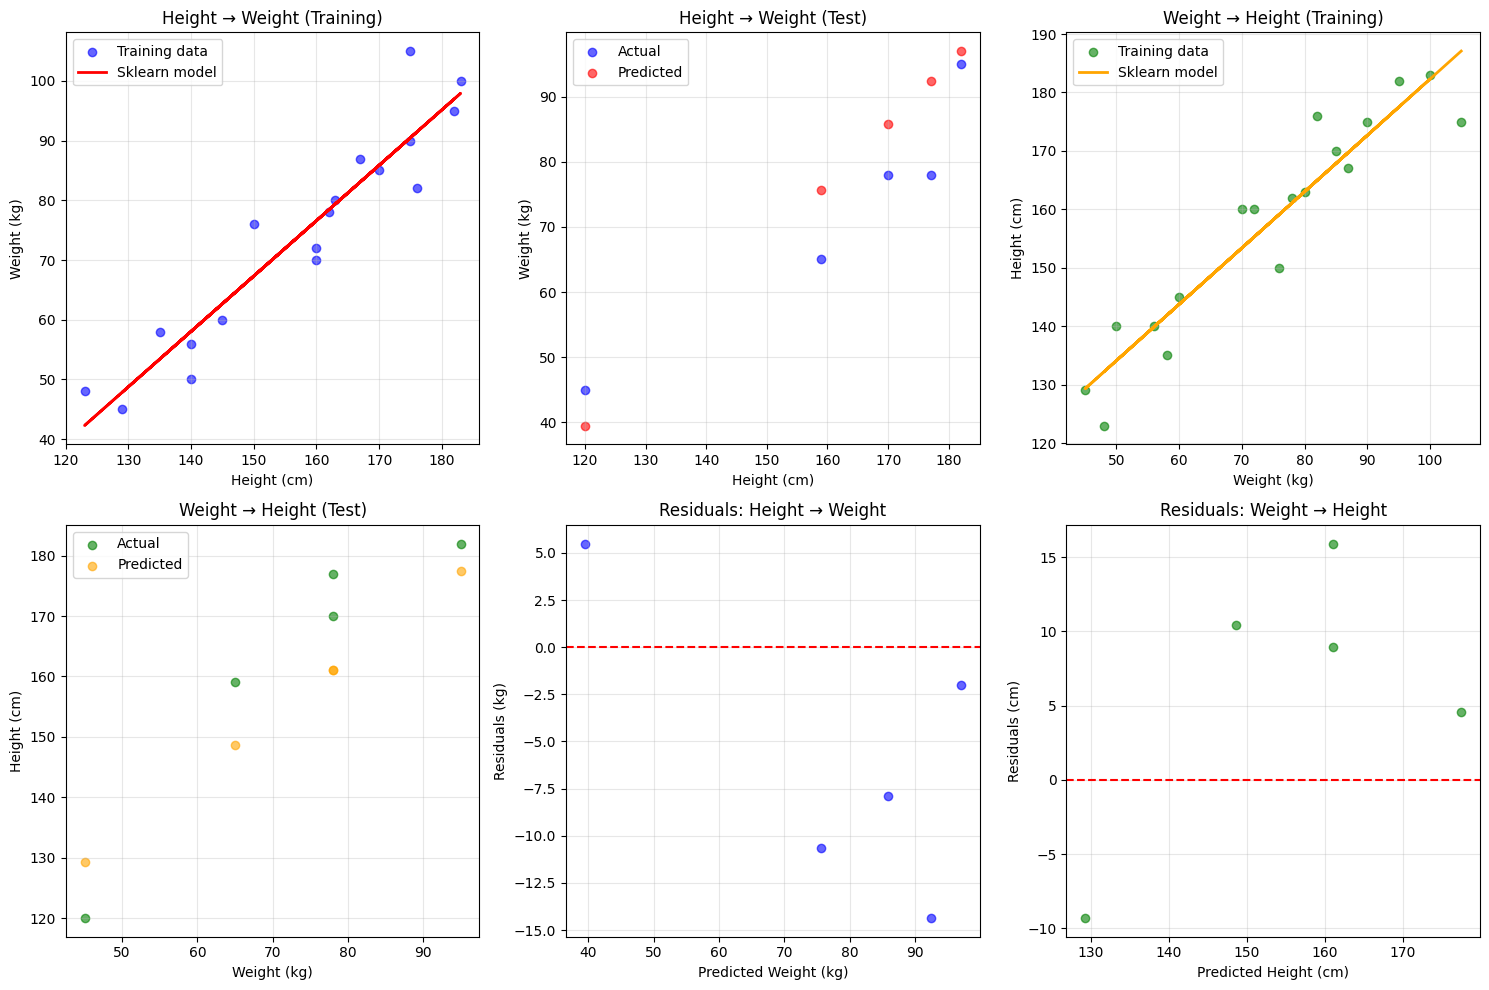

In [14]:
# Comprehensive visualization comparing both approaches
plt.figure(figsize=(15, 10))

# Plot 1: Height → Weight (Primary approach)
plt.subplot(2, 3, 1)
plt.scatter(xtrain, ytrain, color='blue', alpha=0.6, label='Training data')
plt.plot(xtrain, linear.predict(xtrain_scaled), color='red', linewidth=2, label='Sklearn model')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height → Weight (Training)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Height → Weight (Test data)
plt.subplot(2, 3, 2)
plt.scatter(xtest, ytest, color='blue', alpha=0.6, label='Actual')
plt.scatter(xtest, ypred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height → Weight (Test)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Weight → Height (Alternative approach)
plt.subplot(2, 3, 3)
plt.scatter(xtrain_alt, ytrain_alt, color='green', alpha=0.6, label='Training data')
plt.plot(xtrain_alt, linear_alt.predict(xtrain_alt_scaled), color='orange', linewidth=2, label='Sklearn model')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Weight → Height (Training)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Weight → Height (Test data)
plt.subplot(2, 3, 4)
ypred_alt = linear_alt.predict(xtest_alt_scaled)
plt.scatter(xtest_alt, ytest_alt, color='green', alpha=0.6, label='Actual')
plt.scatter(xtest_alt, ypred_alt, color='orange', alpha=0.6, label='Predicted')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Weight → Height (Test)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Residuals comparison (Height → Weight)
plt.subplot(2, 3, 5)
residuals_hw = ytest - ypred
plt.scatter(ypred, residuals_hw, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Weight (kg)')
plt.ylabel('Residuals (kg)')
plt.title('Residuals: Height → Weight')
plt.grid(True, alpha=0.3)

# Plot 6: Residuals comparison (Weight → Height)
plt.subplot(2, 3, 6)
residuals_wh = ytest_alt - ypred_alt
plt.scatter(ypred_alt, residuals_wh, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Height (cm)')
plt.ylabel('Residuals (cm)')
plt.title('Residuals: Weight → Height')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
# Model comparison summary
print("="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

# Height → Weight model performance
mse_hw = mean_squared_error(ytest, ypred)
r2_hw = r2_score(ytest, ypred)

# Weight → Height model performance  
mse_wh = mean_squared_error(ytest_alt, ypred_alt)
r2_wh = r2_score(ytest_alt, ypred_alt)

print(f"{'Model':<25} {'R² Score':<12} {'RMSE':<12} {'MSE':<12}")
print("-" * 60)
print(f"{'Height → Weight':<25} {r2_hw:<12.4f} {np.sqrt(mse_hw):<12.2f} {mse_hw:<12.2f}")
print(f"{'Weight → Height':<25} {r2_wh:<12.4f} {np.sqrt(mse_wh):<12.2f} {mse_wh:<12.2f}")

print(f"\n{'Model':<25} {'Sklearn Coef':<15} {'OLS Coef':<15} {'Difference':<12}")
print("-" * 70)
print(f"{'Height → Weight':<25} {linear.coef_[0]:<15.4f} {ols_results.params[1]:<15.4f} {abs(linear.coef_[0] - ols_results.params[1]):<12.6f}")
print(f"{'Weight → Height':<25} {linear_alt.coef_[0]:<15.4f} {ols_results_alt.params[1]:<15.4f} {abs(linear_alt.coef_[0] - ols_results_alt.params[1]):<12.6f}")

print(f"\n{'Model':<25} {'Sklearn Intercept':<18} {'OLS Intercept':<18} {'Difference':<12}")
print("-" * 80)
print(f"{'Height → Weight':<25} {linear.intercept_:<18.4f} {ols_results.params[0]:<18.4f} {abs(linear.intercept_ - ols_results.params[0]):<12.6f}")
print(f"{'Weight → Height':<25} {linear_alt.intercept_:<18.4f} {ols_results_alt.params[0]:<18.4f} {abs(linear_alt.intercept_ - ols_results_alt.params[0]):<12.6f}")


MODEL COMPARISON SUMMARY
Model                     R² Score     RMSE         MSE         
------------------------------------------------------------
Height → Weight           0.6982       9.12         83.24       
Weight → Height           0.7770       10.48        109.78      

Model                     Sklearn Coef    OLS Coef        Difference  
----------------------------------------------------------------------
Height → Weight           16.7156         16.7156         0.000000    
Weight → Height           17.0344         17.0344         0.000000    

Model                     Sklearn Intercept  OLS Intercept      Difference  
--------------------------------------------------------------------------------
Height → Weight           74.2778            74.2778            0.000000    
Weight → Height           157.5000           157.5000           0.000000    


/tmp/ipykernel_43794/3133150414.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'Height → Weight':<25} {linear.coef_[0]:<15.4f} {ols_results.params[1]:<15.4f} {abs(linear.coef_[0] - ols_results.params[1]):<12.6f}")
/tmp/ipykernel_43794/3133150414.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{'Weight → Height':<25} {linear_alt.coef_[0]:<15.4f} {ols_results_alt.params[1]:<15.4f} {abs(linear_alt.coef_[0] - ols_results_alt.params[1]):<12.6f}")
/tmp/ipykernel_43794/3133150414.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

CONCLUSION:

• Both Sklearn and OLS give nearly identical results (differences < 0.000001)

• This confirms that both libraries use the same mathematical approach

• The choice between Height→Weight vs Weight→Height depends on your use case

• Both models show strong linear relationships (R² > 0.7)